image shape: (800, 1600, 3)
gray shape:  (800, 1600)


Text(0.5, 1.0, 'Gray Image')

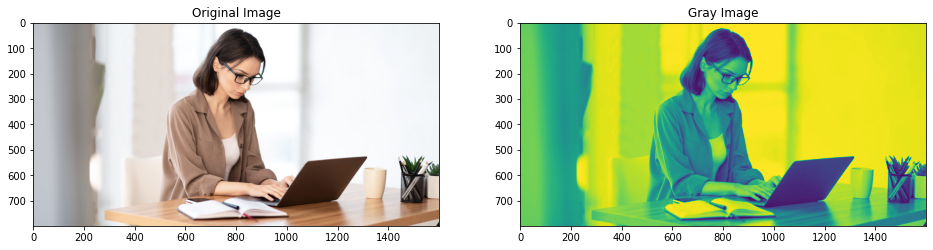

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = plt.imread('benefits-of-working-from-home.jpg', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('image shape:', img.shape)
print('gray shape: ', gray.shape)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gray)
plt.title('Gray Image')

In [2]:
# Calculate gradient gx, gy
gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)
1
2
3
print('gray shape: {}'.format(gray.shape))
print('gx shape: {}'.format(gx.shape))
print('gy shape: {}'.format(gy.shape))


gray shape: (800, 1600)
gx shape: (800, 1600)
gy shape: (800, 1600)


In [3]:
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True) 
print('gradient format: {}'.format(g.shape))
print('theta format: {}'.format(theta.shape))

gradient format: (800, 1600)
theta format: (800, 1600)


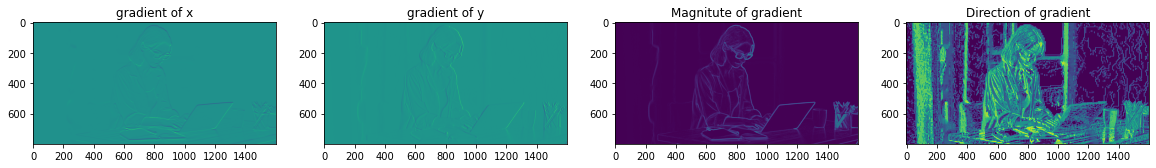

In [4]:
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)

In [5]:
print('Kích thước ảnh gốc: ', img.shape)

# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# 2. Tính toán các tham số truyền vào HOGDescriptor
# winSize: Kích thước của bức ảnh được crop để chia hết cho cell size.
winSize = (img.shape[1] // cell_size[1] * cell_size[1], img.shape[0] // cell_size[0] * cell_size[0])
# blockSize: Kích thước của 1 block
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
# blockStride: Số bước di chuyển của block khi thực hiện chuẩn hóa histogram bước 3
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

# 3. Compute HOG descriptor
hog = cv2.HOGDescriptor(_winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _cellSize=cell_size,
                        _nbins=nbins)

# Kích thước của lưới ô vuông.
n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
print('Kích thước lưới ô vuông (ô vuông): ', n_cells)

# Reshape hog feature
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  

print('Kích thước hog feature (h, w, block_size_h, block_size_w, nbins): ', hog_feats.shape)

Kích thước ảnh gốc:  (800, 1600, 3)
Kích thước bức ảnh crop theo winSize (pixel):  (1600, 800)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)
Kích thước lưới ô vuông (ô vuông):  (100, 200)
Kích thước hog feature (h, w, block_size_h, block_size_w, nbins):  (99, 199, 2, 2, 9)


In [6]:
from skimage import feature
H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

print('Kích thước hog features: ', H.shape)


Kích thước hog features:  (709236,)


In [8]:
print('Vector HOG có dạng:',H)

Vector HOG có dạng: [0.36286919 0.         0.         ... 0.03686439 0.0137639  0.0326613 ]
